# Introduction

Chicago's demographics show that it is a large and ethnically diverse metropolis. It is one of the largest city in the United States with a long history of international immigration. Over the last decade the city has been growing faster than the region. 

This final project explores the best locations for Japanese restaurants throughout the city of Chicago. it has a long tradition of different ethnical restaurants. Now when the idea of a healthy lifestyle conquered the minds of people all over the country, Japanese restaurants became extremely popular, as they offer a healthy alternative to regular American eating habits. However, as with any business, opening a new restaurant requires serious considerations and is more complicated than it seems from the first glance. In particular, the location of the restaurant is one of the most important factors that will affect whether it will have success or a failure. So our project will attempt to answer the questions “Where should the investor open a Japanese Restaurant?” and “Where should I go If I want great Japanese food?”

## Data

In order to answer the above questions, data on Chicago neighborhoods, Community Area to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

Chicago City data containing the neighborhoods and Community Area, latitudes, and longitudes will be obtained from the data source: https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

## Methodology

• Data will be collected from https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Japanese restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings.

• Finally, the data be will be visually assessed using graphing from Python libraries.

## Problem Statement

1. What is / are the best location(s) for Japanese cuisine in Chicago City?
2. In what Neighborhood and/or Community should the investor open a Japanese restaurant to have the best chance of being successful?
3. Where would I go in Chicago City to have the best Japanese food?


## Before we get the data and start exploring it, let's import all required libraries .

In [110]:
!pip install folium

In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os


import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')  

Libraries imported.


## My variables

In [6]:
# Define Foursquare Credentials and Version

CLIENT_ID = '45NDOY2VY2Y0TAPY5JO30R3FG4LFZVFEZQFMF40WNPKNTSAP' # your Foursquare ID
CLIENT_SECRET = 'G1D4TUFQNIDJNBNYURP5K0IF0L0JXOAAAAOFJQXJAYS5A42F' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [43]:
import requests
from bs4 import BeautifulSoup
chicago_url="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago"
chicago_data=requests.get(chicago_url).text
soup=BeautifulSoup(chicago_data, "lxml")
#print(soup.title)
chicago_table=str(soup.table)
df=pd.read_html(chicago_table)
chi_neigh=df[0]
#chi_neigh.head()

#remove rows which has same Neighbourhood and Community Area
chicago_dataset= chi_neigh[chi_neigh["Neighborhood"] != chi_neigh["Community area"]].reset_index(drop=True)
chicago_dataset.head(10)

chicago_dataset["Latitude"]=""
chicago_dataset["Longitude"]=""
chicago_dataset["Location"]=""
#chicago_dataset=chicago_dataset.rest_index()
for n, neigh in zip(range(0,len(chicago_dataset['Neighborhood'])), chicago_dataset['Neighborhood'] ):
    address = "{}, Chicago , Illinois".format(chicago_dataset['Neighborhood'][n])
    #print(chicago_dataset['Neighborhood'])
    #print("")
    try:
        geolocator = Nominatim(user_agent='chi_exploere')
        location = geolocator.geocode(address)
        chicago_dataset.loc[n, 'Location'] = str(location)
        chicago_dataset.loc[n, 'Latitude'] = location.latitude
        chicago_dataset.loc[n, 'Longitude'] = location.longitude
    except AttributeError:
        continue
    
chicago_dataset.head()
#print(chicago_dataset['Neighborhood'].loc[0])

,Neighborhood,Community area,Latitude,Longitude,Location
0,Altgeld Gardens,Riverdale,41.6553,-87.6096,"Altgeld Gardens, Riverdale, Chicago, Hyde Park..."
1,Andersonville,Edgewater,41.9771,-87.6693,"Andersonville Park, 5233, Summerdale, Edgewate..."
2,Ashburn Estates,Ashburn,,,None
3,Avondale Gardens,Irving Park,41.9389,-87.7112,"Avondale, Chicago, Jefferson Township, Cook Co..."
4,Back of the Yards,New City,41.8075,-87.6661,"Back of the Yards, New City, Chicago, Lake Tow..."


In [47]:
chicago_dataset.to_csv('chicago1.csv')
chicago_dataset.head(20)

,Neighborhood,Community area,Latitude,Longitude,Location
0,Altgeld Gardens,Riverdale,41.6553,-87.6096,"Altgeld Gardens, Riverdale, Chicago, Hyde Park..."
1,Andersonville,Edgewater,41.9771,-87.6693,"Andersonville Park, 5233, Summerdale, Edgewate..."
2,Ashburn Estates,Ashburn,,,None
3,Avondale Gardens,Irving Park,41.9389,-87.7112,"Avondale, Chicago, Jefferson Township, Cook Co..."
4,Back of the Yards,New City,41.8075,-87.6661,"Back of the Yards, New City, Chicago, Lake Tow..."
5,Belmont Central,Belmont Cragin,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
6,Belmont Gardens,Hermosa,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
7,Belmont Heights,Dunning,,,None
8,Belmont Terrace,Dunning,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
9,Beverly View,Ashburn,41.7182,-87.6718,"Beverly, Chicago, Lake Township, Cook County, ..."


In [51]:
#filter data which has longitude and latitude missing
chicago_dataset = chicago_dataset[chicago_dataset["Latitude"] != ""]
chicago_dataset.head(20)

,Neighborhood,Community area,Latitude,Longitude,Location
0,Altgeld Gardens,Riverdale,41.6553,-87.6096,"Altgeld Gardens, Riverdale, Chicago, Hyde Park..."
1,Andersonville,Edgewater,41.9771,-87.6693,"Andersonville Park, 5233, Summerdale, Edgewate..."
3,Avondale Gardens,Irving Park,41.9389,-87.7112,"Avondale, Chicago, Jefferson Township, Cook Co..."
4,Back of the Yards,New City,41.8075,-87.6661,"Back of the Yards, New City, Chicago, Lake Tow..."
5,Belmont Central,Belmont Cragin,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
6,Belmont Gardens,Hermosa,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
8,Belmont Terrace,Dunning,41.9398,-87.6533,"Belmont, 945, West Belmont Avenue, Boystown, L..."
9,Beverly View,Ashburn,41.7182,-87.6718,"Beverly, Chicago, Lake Township, Cook County, ..."
10,Beverly Woods,Morgan Park,41.6834,-87.6812,"Beverly Woods, 11532, South Western Avenue, Mo..."
11,Big Oaks,Norwood Park,41.7684,-87.6016,"William Hale ""Big Bill"" Thompson, East 71st St..."


## Now let's define the functions we are going to use later in this project

In [62]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    column_names=['ID','Name','Category']
    df = pd.DataFrame(columns=column_names)
    try:
        results = requests.get(url).json()
        venue_data=results['response']['groups'][0]['items']
        venue_details=[]
        for row in venue_data:
            try:
                venue_id=row['venue']['id']
                venue_name=row['venue']['name']
                venue_category=row['venue']['categories'][0]['name']
                venue_details.append([venue_id,venue_name,venue_category])
            except KeyError:
                pass
        df = pd.DataFrame(venue_details,columns=column_names)
    except:
        pass
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df




## Now let's use the above codes to get our initial Chicago data

In [52]:
chicago_dataset.shape

(163, 5)

So there are total of 163 different Neighborhoods in Chicago.  

## Initial Data Analysis

Now let's analyze our initial data. 

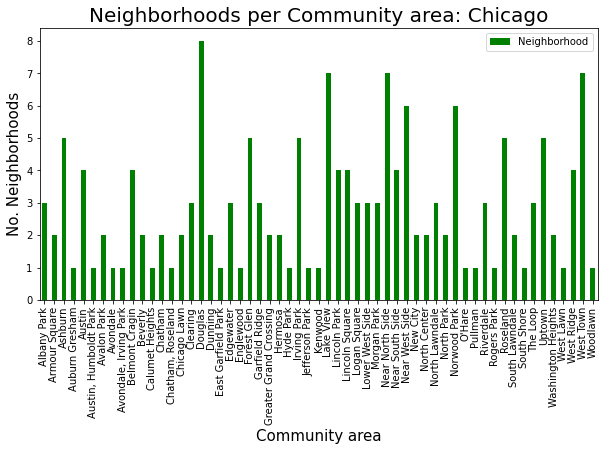

In [55]:
clr = "green"
chicago_dataset.groupby('Community area')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Community area: Chicago', fontsize = 20)
plt.xlabel('Community area', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

## Let's analyze further and see how many Japanese restaurants there are in each neighborhood and Community. After it, graph the results.

In [64]:
# queens has most neighborhoods
# prepare neighborhood list that contains japanese restaurants
column_names=['Community area', 'Neighborhood', 'ID','Name']
japanese_rest_chicago=pd.DataFrame(columns=column_names)
count=1
for row in chicago_dataset.values.tolist():
    Neighborhood, Community, Latitude, Longitude, Location =row
    venues = get_venues(Latitude,Longitude)
    japanese_restaurants=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(chicago_dataset),')','Japanese Restaurants in '+Neighborhood+', '+Community+':'+str(len(japanese_restaurants)))
    print(row)
    for resturant_detail in japanese_restaurants.values.tolist():
        id, name , category=resturant_detail
        japanese_rest_chicago = japanese_rest_chicago.append({'Community area': Community,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 163 ) Japanese Restaurants in Altgeld Gardens, Riverdale:0
['Altgeld Gardens', 'Riverdale', 41.6552585, -87.60958355351951, 'Altgeld Gardens, Riverdale, Chicago, Hyde Park Township, Cook County, Illinois, United States']
( 2 / 163 ) Japanese Restaurants in Andersonville, Edgewater:0
['Andersonville', 'Edgewater', 41.9771393, -87.66927341557962, 'Andersonville Park, 5233, Summerdale, Edgewater, Chicago, Lake View Township, Cook County, Illinois, 60640, United States']
( 3 / 163 ) Japanese Restaurants in Avondale Gardens, Irving Park:0
['Avondale Gardens', 'Irving Park', 41.9389208, -87.711168, 'Avondale, Chicago, Jefferson Township, Cook County, Illinois, 60618, United States']
( 4 / 163 ) Japanese Restaurants in Back of the Yards, New City:0
['Back of the Yards', 'New City', 41.8075332, -87.6661199, 'Back of the Yards, New City, Chicago, Lake Township, Cook County, Illinois, 60609, United States']
( 5 / 163 ) Japanese Restaurants in Belmont Central, Belmont Cragin:1
['Belmont Cen

In [73]:
japanese_rest_chicago.head(100)

#japanese_rest_chicago.to_csv('japanese_rest_chicago1.csv') 

,Community area,Neighborhood,ID,Name
0,Belmont Cragin,Belmont Central,4b78c82af964a52024e22ee3,Yoshi's Cafe
1,Hermosa,Belmont Gardens,4b78c82af964a52024e22ee3,Yoshi's Cafe
2,Dunning,Belmont Terrace,4b78c82af964a52024e22ee3,Yoshi's Cafe
3,Lake View,Boystown,4b78c82af964a52024e22ee3,Yoshi's Cafe
4,Lake View,Boystown,4fcacd4ae4b09ba63b708f23,Matsuya
5,Lake View,Boystown,548778a9498e19bef4947291,Shiawase Japanese Restaurant
6,Douglas,The Gap,4c3e115bdb3b1b8d09e66495,Gyu-Kaku Japanese BBQ
7,Austin,The Island,4dac89634b22f071eae51772,Roka Akor
8,Lake View,Lake View East,4fcacd4ae4b09ba63b708f23,Matsuya
9,South Lawndale,Little Village,4dac89634b22f071eae51772,Roka Akor


In [8]:
# Save the information so far to a .csv file due to limited calls on FourSquare
japanese_rest_chicago.to_csv('japanese_rest_chicago.csv') 


In [74]:
japanese_rest_chicago.shape

(14, 4)

We got 14 Japanese Restaurants across the Chicago City. 

As we continue our analysis, we see below that although lakeview  had the less number of neighborhoods, it does have the highest number of Japanese restaurants. Additionally, we see how many restaurants the top 6 neighborhoods have. The neighborhood of Boystown has the highest number of Japanese restaurants in all of Chicago and is actually located in the Community of Lake View .

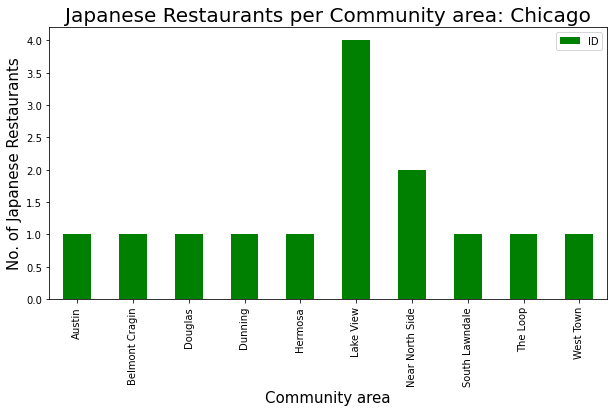

In [76]:
japanese_rest_chicago.groupby('Community area')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Japanese Restaurants per Community area: Chicago', fontsize = 20)
plt.xlabel('Community area', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

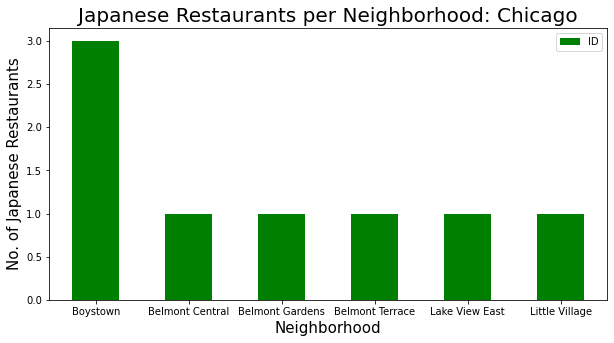

In [77]:
NOofNeigh = 6 # top number for graphing all the same past 6
japanese_rest_chicago.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Japanese Restaurants per Neighborhood: Chicago', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Japanese Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

In [78]:
japanese_rest_chicago[japanese_rest_chicago['Neighborhood']=='Boystown']

,Community area,Neighborhood,ID,Name
3,Lake View,Boystown,4b78c82af964a52024e22ee3,Yoshi's Cafe
4,Lake View,Boystown,4fcacd4ae4b09ba63b708f23,Matsuya
5,Lake View,Boystown,548778a9498e19bef4947291,Shiawase Japanese Restaurant


So the Boystown in Lake View has the highest number of Japanese Restaurants with a total count of 3.

Now we will get the ranking of each restaurant for further analysis.

In [88]:
column_names=['Community area', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_chicago=pd.DataFrame(columns=column_names)
count=1
for row in japanese_rest_chicago.values.tolist():
    Community,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(japanese_rest_chicago),')','processed')
    japanese_rest_stats_chicago = japanese_rest_stats_chicago.append({'Community area': Community,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '605f5bbfe5e3e248faf1d870'}, 'response': {'venue': {'id': '4b78c82af964a52024e22ee3', 'name': "Yoshi's Cafe", 'contact': {'phone': '7732486160', 'formattedPhone': '(773) 248-6160'}, 'location': {'address': '3257 N Halsted St', 'crossStreet': 'at W. Aldine Ave.', 'lat': 41.94169355603553, 'lng': -87.6492418251221, 'labeledLatLngs': [{'label': 'display', 'lat': 41.94169355603553, 'lng': -87.6492418251221}, {'label': 'entrance', 'lat': 41.941607, 'lng': -87.649201}], 'postalCode': '60657', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['3257 N Halsted St (at W. Aldine Ave.)', 'Chicago, IL 60657', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/yoshis-cafe/4b78c82af964a52024e22ee3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanes

In [89]:
japanese_rest_stats_chicago.tail()

,Community area,Neighborhood,ID,Name,Likes,Rating,Tips
9,South Lawndale,Little Village,4dac89634b22f071eae51772,Roka Akor,235,8.6,90
10,Near North Side,Magnificent Mile,4c3e115bdb3b1b8d09e66495,Gyu-Kaku Japanese BBQ,436,8.9,135
11,The Loop,Printer's Row,51018fa2e4b0ca484f8ac272,UMAI Japanese Kitchen & Sushi,174,8.5,41
12,West Town,Smith Park,4fd4f7e6e4b034e1fabcdfdb,Kai Zan,143,9.1,57
13,Near North Side,Streeterville,4c3e115bdb3b1b8d09e66495,Gyu-Kaku Japanese BBQ,436,8.9,135


In [90]:
japanese_rest_stats_chicago.to_csv('japanese_rest_stats_chicago.csv') # As I move through this project I continue to save data to a .csv file 

In [91]:
japanese_rest_stats_chicago.shape

(14, 7)

We got statistics for all 14 Japanese Restaurants in Chicago. 

Let's check what values we have in our DataFrame

In [92]:
japanese_rest_stats_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Community area  14 non-null     object 
 1   Neighborhood    14 non-null     object 
 2   ID              14 non-null     object 
 3   Name            14 non-null     object 
 4   Likes           14 non-null     object 
 5   Rating          14 non-null     float64
 6   Tips            14 non-null     object 
dtypes: float64(1), object(6)
memory usage: 912.0+ bytes


We see that the values like Likes, Tips are string values. We would need to convert them into float for further analysis

In [93]:
japanese_rest_stats_chicago['Likes'] = japanese_rest_stats_chicago['Likes'].astype('float64')
japanese_rest_stats_chicago['Tips'] = japanese_rest_stats_chicago['Tips'].astype('float64')
japanese_rest_stats_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Community area  14 non-null     object 
 1   Neighborhood    14 non-null     object 
 2   ID              14 non-null     object 
 3   Name            14 non-null     object 
 4   Likes           14 non-null     float64
 5   Rating          14 non-null     float64
 6   Tips            14 non-null     float64
dtypes: float64(3), object(4)
memory usage: 912.0+ bytes


## Now when the data types look correct, let's continue our analysis.

In [94]:
japanese_rest_stats_chicago.describe()

,Likes,Rating,Tips
count,14.000000,14.000000,14.000000
mean,170.071429,8.557143,59.357143
std,161.953205,0.492582,48.323600
min,14.000000,7.500000,6.000000
25%,58.000000,8.525000,30.000000
50%,100.500000,8.800000,35.500000
75%,235.000000,8.875000,90.000000
max,436.000000,9.100000,135.000000


In [95]:
# Resturant with maximum Likes
japanese_rest_stats_chicago.iloc[japanese_rest_stats_chicago['Likes'].idxmax()]

Community area                     Douglas
Neighborhood                       The Gap
ID                4c3e115bdb3b1b8d09e66495
Name                 Gyu-Kaku Japanese BBQ
Likes                                  436
Rating                                 8.9
Tips                                   135
Name: 6, dtype: object

In [97]:
# Resturant with maximum Ratings
japanese_rest_stats_chicago.iloc[japanese_rest_stats_chicago['Rating'].idxmax()]

Community area                   West Town
Neighborhood                    Smith Park
ID                4fd4f7e6e4b034e1fabcdfdb
Name                               Kai Zan
Likes                                  143
Rating                                 9.1
Tips                                    57
Name: 12, dtype: object

In [98]:
# Resturant with maximum Tips
japanese_rest_stats_chicago.iloc[japanese_rest_stats_chicago['Tips'].idxmax()]

Community area                     Douglas
Neighborhood                       The Gap
ID                4c3e115bdb3b1b8d09e66495
Name                 Gyu-Kaku Japanese BBQ
Likes                                  436
Rating                                 8.9
Tips                                   135
Name: 6, dtype: object

## Now let's identify and visualize neighborhood with the maximum average rating of restaurants

In [99]:
chicago_neighborhood_stats=japanese_rest_stats_chicago.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
chicago_neighborhood_stats.columns=['Neighborhood','Average Rating']
chicago_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
8,Smith Park,9.1
6,Magnificent Mile,8.9
9,Streeterville,8.9
10,The Gap,8.9
0,Belmont Central,8.8
1,Belmont Gardens,8.8
2,Belmont Terrace,8.8
5,Little Village,8.6
11,The Island,8.6
7,Printer's Row,8.5


Above are the top neighborhoods with the highest average ratings of Japanese restaurants.

In [109]:
chicago_community_stats=japanese_rest_stats_chicago.groupby('Community area',as_index=False).mean()[['Community area','Rating']]
chicago_community_stats.columns=['Community area','Average Rating']
chicago_community_stats.sort_values(['Average Rating'],ascending=False)
chicago_community_stats

,Community area,Average Rating
0,Austin,8.600
1,Belmont Cragin,8.800
2,Douglas,8.900
3,Dunning,8.800
4,Hermosa,8.800
5,Lake View,7.975
6,Near North Side,8.900
7,South Lawndale,8.600
8,The Loop,8.500
9,West Town,9.100


Similarly these are the average ratings of Japanese Restaurants for each Community area

## Let's visualize the results

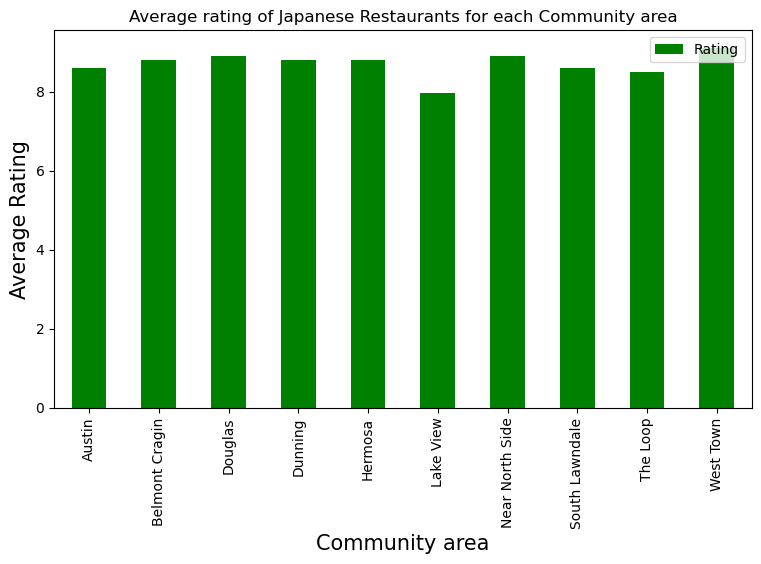

In [101]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Japanese Restaurants for each Community area')
plt.xlabel('Community area', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
japanese_rest_stats_chicago.groupby('Community area').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

We will consider all the neighborhoods with average rating greater or equal 8.0 to visualize on a map

In [102]:
chicago_neighborhood_stats=chicago_neighborhood_stats[chicago_neighborhood_stats['Average Rating']>=8.0]
chicago_neighborhood_stats

,Neighborhood,Average Rating
0,Belmont Central,8.800000
1,Belmont Gardens,8.800000
2,Belmont Terrace,8.800000
3,Boystown,8.033333
5,Little Village,8.600000
6,Magnificent Mile,8.900000
7,Printer's Row,8.500000
8,Smith Park,9.100000
9,Streeterville,8.900000
10,The Gap,8.900000


We will join this Dataset to original New York data to get longitude and latitude

In [103]:
chicago_neighborhood_stats=pd.merge(chicago_neighborhood_stats,chicago_dataset, on='Neighborhood')
chicago_neighborhood_stats=chicago_neighborhood_stats[['Community area','Neighborhood','Latitude','Longitude','Average Rating']]
chicago_neighborhood_stats

,Community area,Neighborhood,Latitude,Longitude,Average Rating
0,Belmont Cragin,Belmont Central,41.9398,-87.6533,8.800000
1,Hermosa,Belmont Gardens,41.9398,-87.6533,8.800000
2,Dunning,Belmont Terrace,41.9398,-87.6533,8.800000
3,Lake View,Boystown,41.9439,-87.6493,8.033333
4,South Lawndale,Little Village,41.891,-87.6356,8.600000
5,Near North Side,Magnificent Mile,41.8945,-87.6242,8.900000
6,The Loop,Printer's Row,41.8738,-87.6289,8.500000
7,West Town,Smith Park,41.8928,-87.6904,9.100000
8,Near North Side,Streeterville,41.8934,-87.622,8.900000
9,Douglas,The Gap,41.8924,-87.6236,8.900000


Now we will show this data on a map

In [107]:
# create map and display it
chicago_map = folium.Map(location=geo_location('Chicago'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in chicago_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Let's add a new field to dataframe for labeling purpose

In [108]:
chicago_neighborhood_stats['Label']=chicago_neighborhood_stats['Neighborhood']+', '+chicago_neighborhood_stats['Community area']+'('+chicago_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in chicago_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(chicago_map)        
# add ratings to map
chicago_map.add_child(rating)

## Results / Conclusion 

West Town have the best rated Japanese restaurants on average. other than Lake view and near south side  have the least amount of Japanese restaurants per Community which is 1. However, of note, Boystown in Lake View has the highest number of Japanese Restaurants in all of Chicago. Despite Lake View having the less number of neighborhoods in all other top communities, it has the most number of Japanese restaurants. Based on the above information, I would state that West Town are the best location for Japanese cuisine in Chicago. To have the best shot of success, I would open a Japanese restaurant in West Town. West Town has same number of  neighborhoods as Lake view  with average ratings exceeding 9.1 on a scale of 1.0 to 10.0 and has less amount of Japanese restaurants than Lake View, making competition easier. Finally, I would go to Kai Zan in West Town for the best Japanese food based on 143 likes. As a final note, all of the above analysis is depended on the accuracy of Four Square data. A more comprehensive analysis and future work would need to incorporate data from other external databases which should include real estate , census and etc.